<a href="https://colab.research.google.com/github/etmaca5/Biology/blob/main/Casanova_Etienne_hw5_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2 code

In [ ]:
## question 2 hw 5
from google.colab import drive
drive.mount('/content/drive')



def add_file_dict(filename):
  output_seqs = []
  with open(filename, 'r') as file:
    line_num = 0
    for line in file:
      if(line[0] != '#' and line[0] != 'A'):
        output_seqs.append(line.split())
    return output_seqs

energy_matrix = add_file_dict('/content/drive/My Drive/RNAP_matrix.txt') #energy matrix in other words


Mounted at /content/drive


In [ ]:
def seq_equal_index(seq1, seq2, index):
  if(seq1[index] == seq2[index]):
    return True;
  return False;

def base_index(base):
  if(base == 'A'):
    return 0;
  if (base == 'C'): #forgot else if syntax in python (makes no difference in this code)
    return 1;
  if(base == 'G'):
    return 2;
  if(base == 'T'):
    return 3;

def calculate_bind_energy(seq, seq_vals):
  default_seq = 'CAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG';
  bind_energy = float(-5.35);
  for i in range(len(seq)):
    if(not seq_equal_index(seq, default_seq, i)):
      seq_base = base_index(seq[i])
      default_base = base_index(default_seq[i])
      bind_energy += (float(seq_vals[i][seq_base]) - float(seq_vals[i][default_base]))
  return bind_energy;

##now to find the bind energy for both



p1 = 'TCGAGTTTACACTTTATGCTTCCGGCTCGTATAATGTGTGG'
p2 = 'TCGAGTTTACACTTTATGCTTCCGGCTCGGATAATGTGTGG'

print("p1 binding energy: ")
print(calculate_bind_energy(p1, energy_matrix))
print("p2 binding energy: ")
print(calculate_bind_energy(p2, energy_matrix))

p1 binding energy: 
-6.995464083050846
p2 binding energy: 
-5.5880783627118635


In [ ]:
#question 2b


def compute_binding_energy(energy_matrix, seq):
  bind_energy = 0.0
  for i in range(len(seq)):
    seq_base_idx = base_index(seq[i])
    bind_energy += float(energy_matrix[i][seq_base_idx])
  return bind_energy



# we will pass in the energy matrix which we derived earlier (in part 2a.)
s1 = 'CAGGCTCTACGCTTTATTCTTGCGGCTCGTATGGTGTGTGG'
s2 = 'GAGGCTGGACACTTTAATCTTCCCTATCGTATGTTGTGTGC'
s3 = 'CGAGCATGCCACCTTAAGCCTCTGGCTCGTATGACGTGTGG'


print('seq 1 binding energy:')
print(compute_binding_energy(energy_matrix, s1))
print('seq 2 binding energy:')
print(compute_binding_energy(energy_matrix, s2))
print('seq 3 binding energy:')
print(compute_binding_energy(energy_matrix, s3))

seq 1 binding energy:
-3.9363706563196317
seq 2 binding energy:
-6.294688950104942
seq 3 binding energy:
-3.2291480237687833


Now for Question 3:

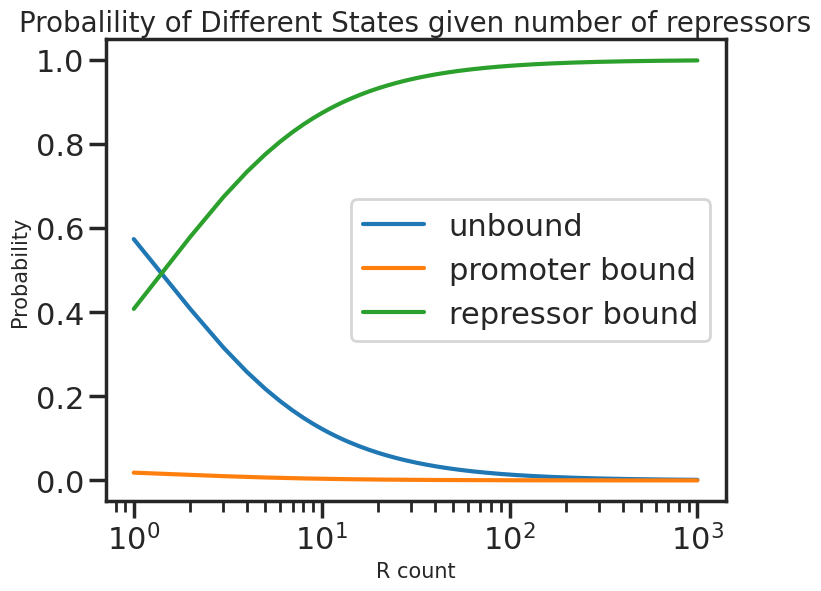

In [ ]:
## for question 3 hw5
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

P = 1000.0
E_p = -5.0
E_r = -15.0
N_ns = 4.6 * (10 ** 6)

def p_promoter(R):
  return (P * math.exp(-E_p)) / (N_ns + R * math.exp(-E_r) + P * math.exp(-E_p))

def p_unbound(R):
  return (N_ns) / (N_ns + R * math.exp(-E_r) + P * math.exp(-E_p))

def p_repressor(R):
  return (R * math.exp(-E_r)) / (N_ns + R * math.exp(-E_r) + P * math.exp(-E_p))

R = np.linspace(1, 1000, 1000)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(R, p_unbound(R));
plt.plot(R, p_promoter(R));
plt.plot(R, p_repressor(R));
plt.xscale("log");
plt.title("Probability of Different States given number of repressors", size = 20);
plt.xlabel('R count', size = 15);
plt.ylabel('Probability', size = 15);
#plt.legend("unbound","promoter bound", "repressor bound")
ax.legend(["unbound","promoter bound", "repressor bound"])
plt.show;

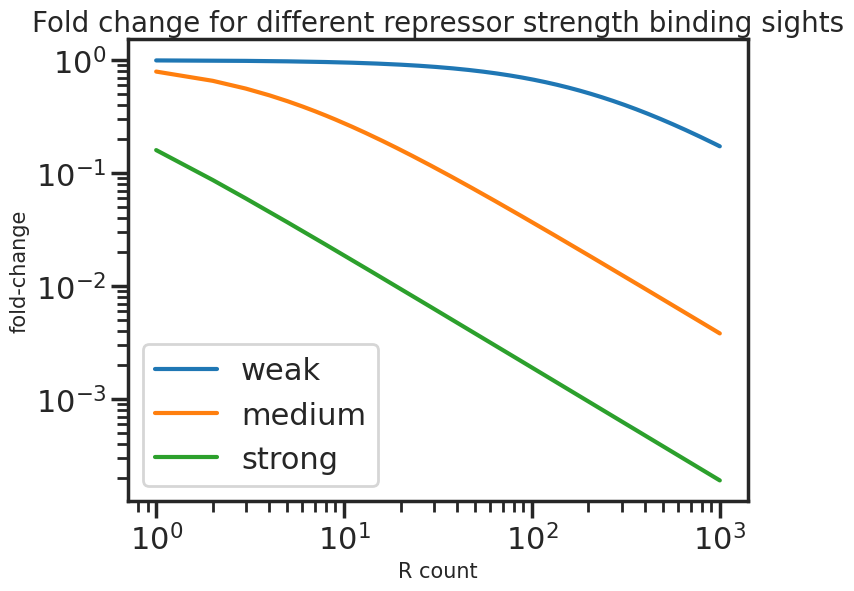

In [ ]:
#question 3f

def fold_change(E_r, R):
  return 1/ (1+ (R / N_ns) * math.exp(-E_r));

R = np.linspace(1, 1000, 1000)

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(R, fold_change(-10.0 , R));
plt.plot(R, fold_change(-14.0, R));
plt.plot(R, fold_change(-17.0, R));
plt.xscale("log");
plt.yscale("log")
plt.title("Fold change for different repressor strength binding sights", size = 20);
plt.xlabel('R count', size = 15);
plt.ylabel('fold-change', size = 15);
ax.legend(["weak","medium", "strong"])
plt.show;


